# Data Mining - Assignment 1 (Task 2 - Classification)


### 1. Load dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving loan_train.csv to loan_train.csv


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('loan_train.csv')

In [4]:
data

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


### 2. Exploratory Data Analysis

In [5]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


Based on the info we can see that there are 345 rows in the data frame and 10 columns displaying customers, their loan status, terms, age, education and Gender. The first two columns seem to be unimportant since they do not have a column name, but this needs to be further investigated. Majority of the useful columns have categorical values which shows a need for encoding.

In [6]:
data.describe(include = 'all')

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


Here we can see that the two unnamed columns have the exact same values and since they do not give any additional important information these can be removed. For the dates we can see that there are 7 unique values for the effective date and 23 unique values for the due date. This signalizes that the due date changes according to the terms which can be weekly (7 days), biweekly (15 days), and monthly payoff schedule (30 days).

In [7]:
data.drop(['Unnamed: 0.1'], axis=1, inplace=True)
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
duplicated_rows = data[data.duplicated(keep=False)]
print(f'Number of duplicated rows: {len(duplicated_rows)}')

Number of duplicated rows: 74


There are no duplicated rows in this dataframe, until now no rows have to be removed.

In [9]:
data.columns = list(map(str.capitalize, data.columns))

In [10]:
data

,Loan_status,Principal,Terms,Effective_date,Due_date,Age,Education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

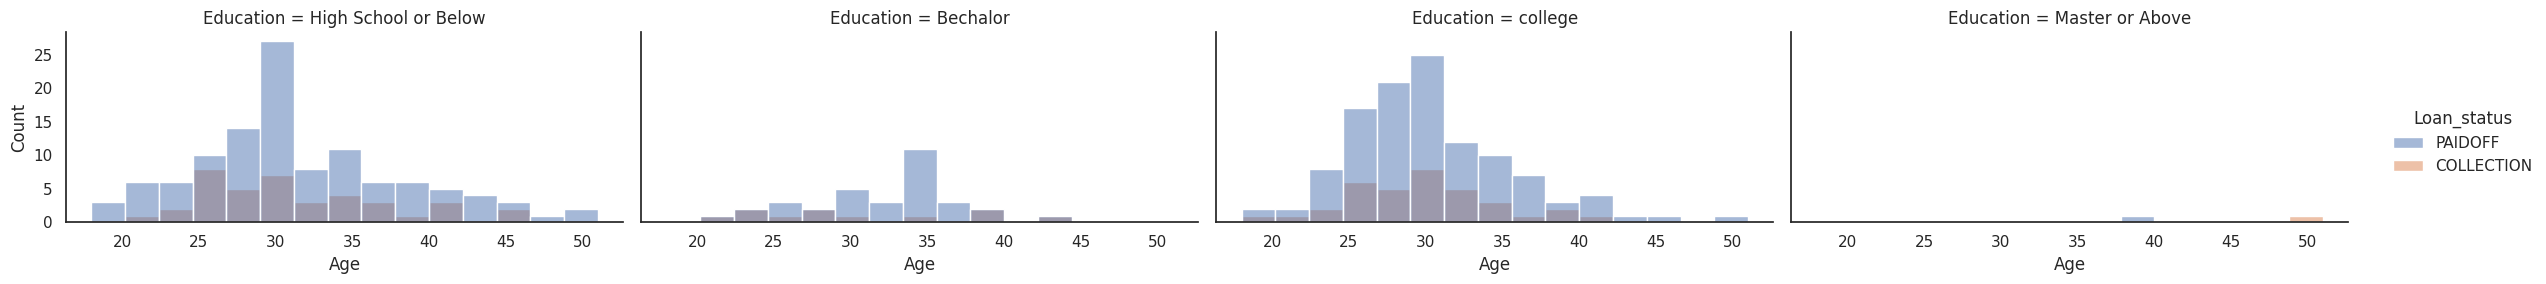

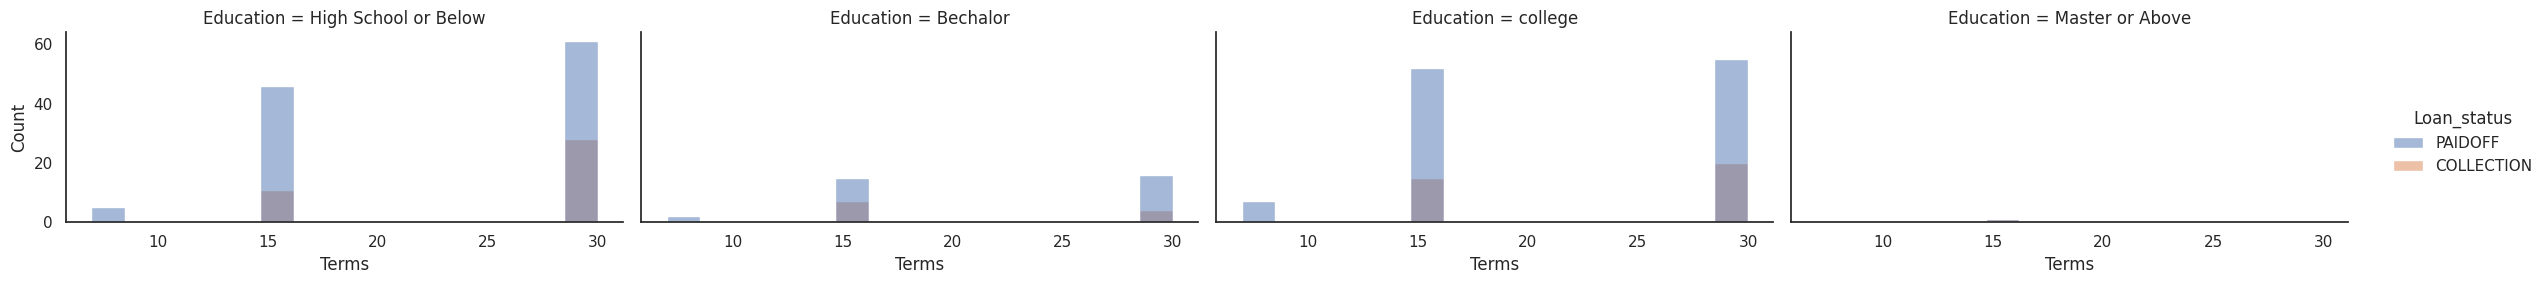

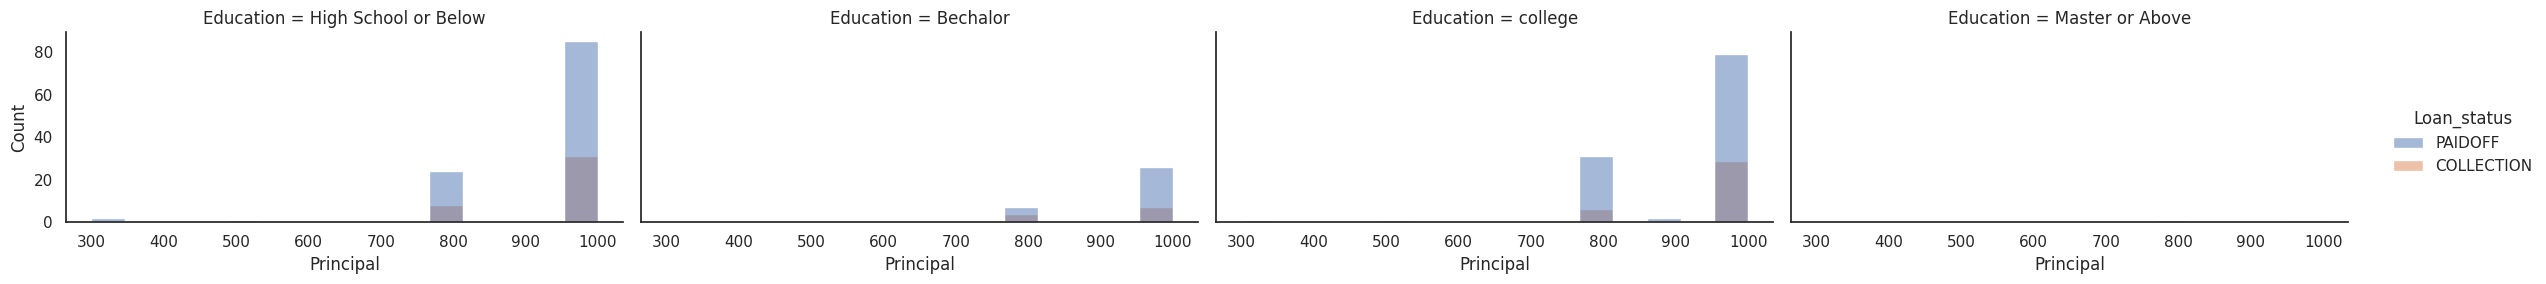

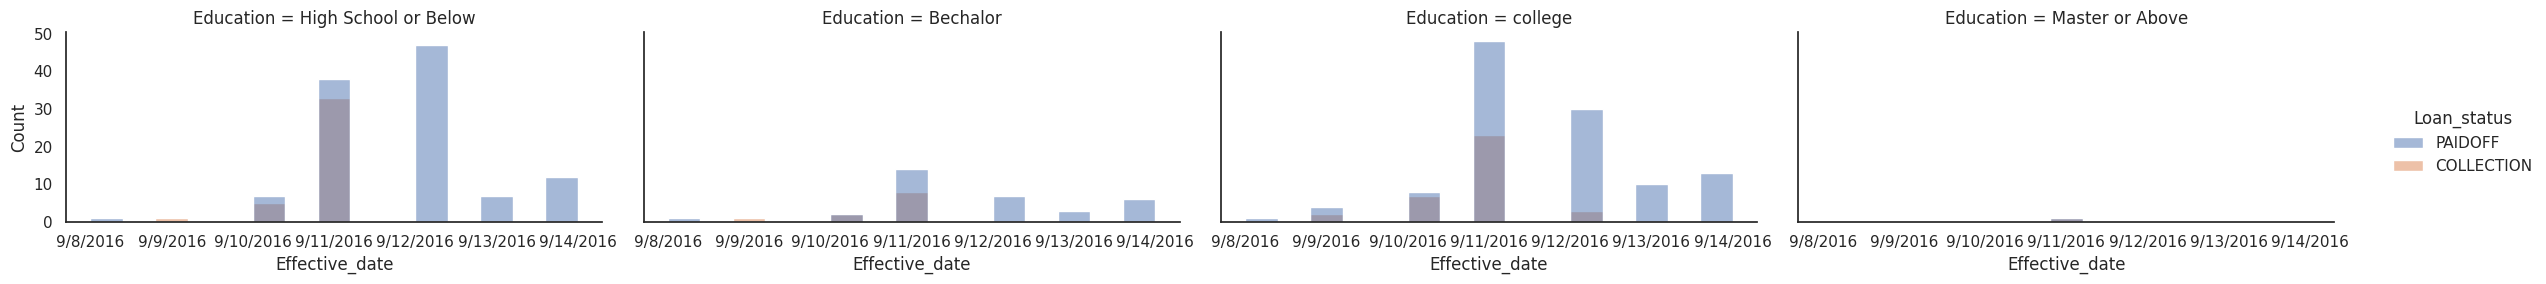

In [12]:
sns.set(style = 'white')
vars = ['Age', 'Terms', 'Principal', 'Effective_date']
for v in vars:
    sns.displot(data = data, x = v, hue = 'Loan_status', col = 'Education', discrete = False, bins = 15, height = 3, aspect = 2)

The count of paid off loans dominates in every feature presented in the plots, which indicates that there are far more loans that have been already paid off in the dataset.
*  **Education:** Individuals with "High School or Below" and "College" education levels represent the bulk of the data. There are very few customers with a master degree or above.
*  **Age:** Most loans are concentrated for individuals aged 30-35. For Master and above there is very less data, but the few loans are primarily in the 40-50 age range. That makes sense since a master takes way longer to complete than the others.
*  **Principal and Terms:** The Principal amounts and Terms show common peaks at specific values, which speaks for a set of values that can be picked for these features.

This indicates that the majority of loans across all variables tend to be successfully paid off, regardless of education level. However, the volume and distribution of loans vary by education, with lower education levels representing a larger proportion of the dataset.

### 3. Data Preprocessing

In [13]:
data.isnull().sum()

,0
Loan_status,0
Principal,0
Terms,0
Effective_date,0
Due_date,0
Age,0
Education,0
Gender,0


Since there are no missing values in this dataframe we do not need to remove rows. Now we can turn the categorical values into numerical values to use them for the analysis.

Since the terms determine the due date we can ignore it for this analysis but the effective date can not be neglected. From the plots earlier we saw that the effective date is always in September 2016, so we just need the month as independent variable.

In [14]:
data['Effective_day'] = data['Effective_date'].apply(lambda x: int(x.split('/')[1]))

Loan status, education and gender need to be turned into numerical values, to be used in the analysis.

In [15]:
data['Loan_status_encoded'] = data['Loan_status'].apply(lambda x: 1 if x == 'PAIDOFF' else 0)

In [16]:
data['Education_encoded'] = data['Education'].apply(lambda x: 1 if x == 'High School or Below' else 2 if x == 'Bechalor' else 3 if x == 'Master or above' else 0)

In [17]:
data['Gender_encoded'] = data['Gender'].apply(lambda x: 1 if x == 'female' else 0)

In [18]:
data

,Loan_status,Principal,Terms,Effective_date,Due_date,Age,Education,Gender,Effective_day,Loan_status_encoded,Education_encoded,Gender_encoded
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male,8,1,1,0
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female,8,1,2,1
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male,8,1,0,0
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female,9,1,0,1
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male,11,0,1,0
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male,11,0,1,0
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male,12,0,0,0
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male,12,0,0,0


Now we can look at the boxplots of every variable to identify potential outliers.

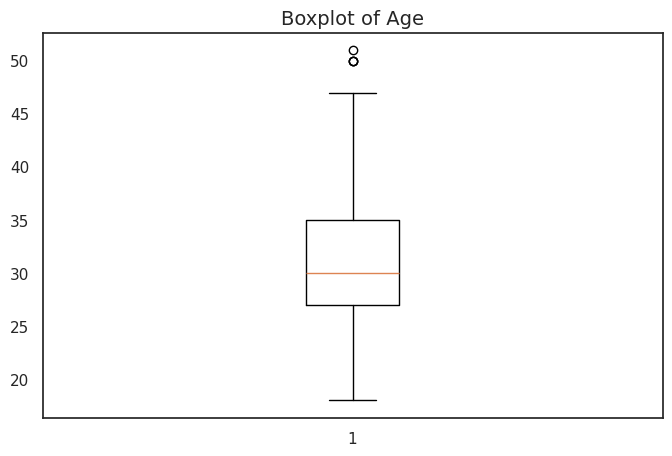

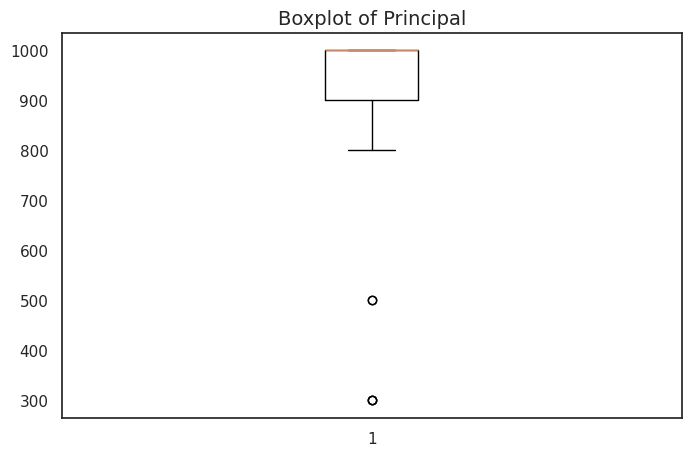

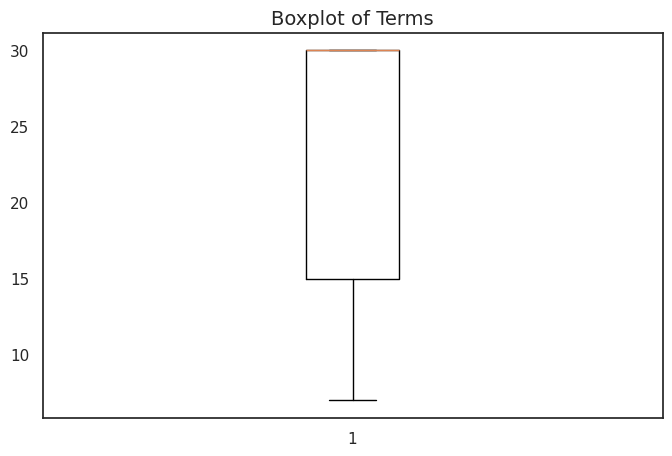

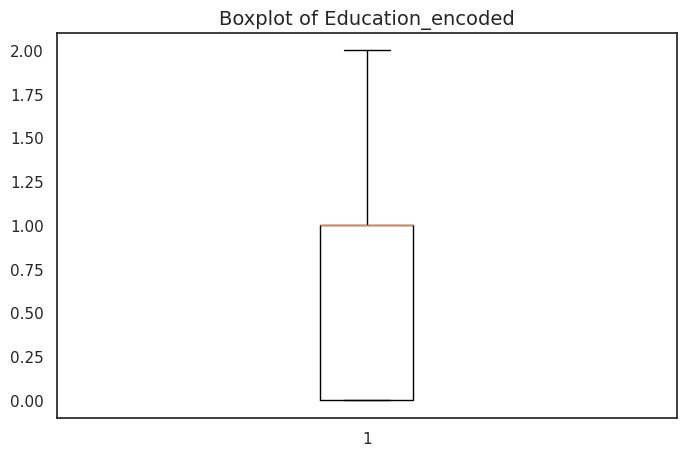

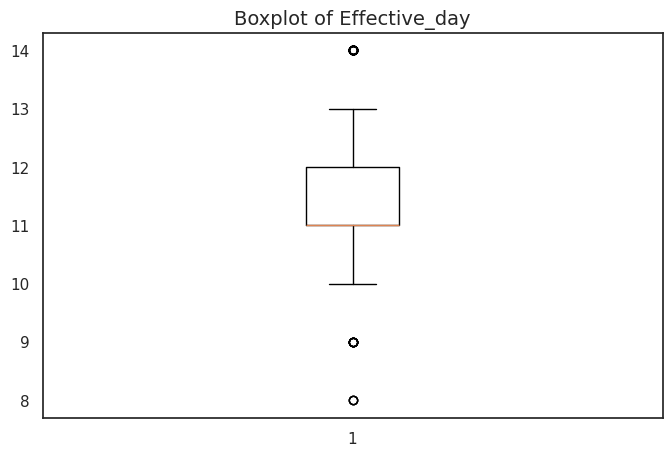

In [19]:
vars = ['Age', 'Principal', 'Terms', 'Education_encoded', 'Effective_day']
for v in vars:
  plt.figure(figsize=(8, 5))
  plt.boxplot(data[v])
  plt.title(f'Boxplot of {v}', fontsize=14)
  plt.show()

There are outliers detected for age, prinicipal and effective date these can be removed if they are not more than 10% of the actual data.

In [20]:
outliers_index1 = set()
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
outliers_index1.update(outliers.index)

print(outliers_index1)

{184, 41, 293, 223}


In [21]:
outliers_index2 = set()
Q1 = data['Principal'].quantile(0.25)
Q3 = data['Principal'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Principal'] < lower_bound) | (data['Principal'] > upper_bound)]
outliers_index2.update(outliers.index)

print(outliers_index2)

{128, 8, 176, 216, 153}


In [22]:
outliers_index3 = set()
Q1 = data['Effective_day'].quantile(0.25)
Q3 = data['Effective_day'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Effective_day'] < lower_bound) | (data['Effective_day'] > upper_bound)]
outliers_index3.update(outliers.index)

print(outliers_index3)

{0, 1, 2, 3, 4, 5, 6, 256, 257, 258, 259, 260, 261, 262, 263, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}


We can remove the rows of outliers from age and principal but there are too many outliers in the effective day, so we will keep them.

In [23]:
data = data.drop(outliers_index1)

In [24]:
data = data.drop(outliers_index2)

In [25]:
data = data.reset_index(drop = True)

In [26]:
data

,Loan_status,Principal,Terms,Effective_date,Due_date,Age,Education,Gender,Effective_day,Loan_status_encoded,Education_encoded,Gender_encoded
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male,8,1,1,0
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female,8,1,2,1
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male,8,1,0,0
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female,9,1,0,1
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
332,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male,11,0,1,0
333,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male,11,0,1,0
334,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male,12,0,0,0
335,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male,12,0,0,0


### 4. Application of different Classification Algorithms

In [27]:
from sklearn.model_selection import train_test_split

We make the encoded loan status our target variable and use all the numerical data we have as features for our classification algorithms. The first step is to define features and target values for the classification models. Here we are using the dataframe from the preprocessing as our features X and our target variable Y.

In [28]:
X = data.drop(['Loan_status_encoded','Effective_date', 'Due_date', 'Loan_status', 'Education', 'Gender'], axis='columns')
y = data['Loan_status_encoded']

For the train test split we are using 70% training anf 30% testing data, since the number of loan status collection is much lower than the number of paid off values. If we have a 70/30 split we ensure that there are enough collection data points in the testing dataset as well. The random state is set to 42 so the data does not change everytime the notebook is run.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train.head()

,Principal,Terms,Age,Effective_day,Education_encoded,Gender_encoded
15,1000,30,32,10,1,0
6,1000,30,28,9,0,0
234,800,15,42,14,1,0
272,1000,30,27,11,0,0
93,1000,30,40,11,0,0


The algorithms are used without any further modification of parameters.

#### 4.1 K-Nearest Neighbour

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [32]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
KNN.score(X_test, y_test)

0.7058823529411765

#### 4.2 Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression(random_state=42, max_iter=1000)

In [35]:
Logistic_Regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [36]:
Logistic_Regression.score(X_test, y_test)

0.7352941176470589

#### 4.3 Decision Tree

In [37]:
from sklearn import tree
Decision_Tree = tree.DecisionTreeClassifier(random_state=42)

In [38]:
Decision_Tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
Decision_Tree.score(X_test, y_test)

0.6764705882352942

#### 4.4 Support Vector Machine

In [40]:
from sklearn.svm import SVC
SVM = SVC(random_state=42)

In [41]:
SVM.fit(X_train, y_train)

SVC(random_state=42)

In [42]:
SVM.score(X_test, y_test)

0.7549019607843137

### 5. Performance Evaluation

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from prettytable import PrettyTable

myTable = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Confusion Matrix"])

models = [KNN, Logistic_Regression, Decision_Tree, SVM]
models_name = ['KNN', 'Logistic_Regression', 'Decision_Tree', 'SVM']

for model in models:
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  x = models.index(model)

  myTable.add_row([models_name[x], accuracy, precision, recall, f1, cm])

print(myTable)

+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1-Score      | Confusion Matrix |
+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|         KNN         | 0.7058823529411765 | 0.7701149425287356 | 0.8701298701298701 | 0.8170731707317073 |     [[ 5 20]     |
|                     |                    |                    |                    |                    |     [10 67]]     |
| Logistic_Regression | 0.7352941176470589 | 0.7717391304347826 | 0.922077922077922  | 0.8402366863905325 |     [[ 4 21]     |
|                     |                    |                    |                    |                    |     [ 6 71]]     |
|    Decision_Tree    | 0.6764705882352942 | 0.7894736842105263 | 0.7792207792207793 | 0.7843137254901961 |    

All of these models seem to be overfitted a reason for this can be that majority of the data points have a loan status of 'paid off'. There are not enough datapoints with the loan status 'collection' to ensure a balanced training set.

*  KNN has good recall, meaning it identifies most paid off loans, but struggles with precision, misclassifying a moderate number of loans as collection. This can result in some false alarms when predicting collections.

*  Logistic Regression performs well overall, especially in recall, ensuring that the majority of paid off loans are correctly identified. It misclassifies less paid off loans as collection compared to KNN.

*  Decision Tree struggles with accuracy and recall compared to KNN and Logistic Regression. It has higher misclassification rates likely due to overfitting or sensitivity to the dataset.

*  SVM achieves the best recall and F1-score, ensuring all paid off loans are identified. However, it completely fails to predict collection loans correctly.

The best model overall is Logistic Regression, as it provides a balanced performance with strong F1-score and recall for the paid off loans.

### 6. Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

Tuning each model using GridSearchCV with the respective parameter grids above will optimize their performance.

#### 6.1 K-Nearest Neighbour

The number of neighbors is set to 7, 9, 11, 15, 17 since larger values generalize more and the models are overfitting.

In [45]:
KNN_GS = GridSearchCV(KNN, {'n_neighbors': [7, 9, 11, 15, 17], 'weights': ['distance']}, scoring = 'precision')
KNN_GS.fit(X_train, y_train)
KNN_GS.score(X_test, y_test)

0.7529411764705882

#### 6.2 Logistic Regression

The solver is set to liblinear since this parameter is ideal for small to medium dataset sizes. The penalty is set to l1 to have sparse feature selection.

In [46]:
Logistic_Regression_GS = GridSearchCV(Logistic_Regression, {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'],
    'penalty': ['l1'], 'max_iter': [100, 200, 500]}, scoring = 'precision')
Logistic_Regression_GS.fit(X_train, y_train)
Logistic_Regression_GS.score(X_test, y_test)

0.7717391304347826

#### 6.3 Decision Tree

Shallower trees prevent overfitting since deeper trees capture more complexity. We need to do something against the overfitting because of this we chose shallow values. Higher values for min_samples_split reduce overfitting as well.

In [47]:
Decision_Tree_GS = GridSearchCV(Decision_Tree, {'max_depth': [None, 3, 5, 7], 'min_samples_split': [10, 20],
    'min_samples_leaf': [1,2,3,4,10]}, scoring = 'precision')
Decision_Tree_GS.fit(X_train, y_train)
Decision_Tree_GS.score(X_test, y_test)

0.8208955223880597

#### 6.4 Support Vector Machine

Smaller values lead to simpler models with more regularization that is why in C we start with 0.1.
Linear is used as kernel since it is best for linearly separable data.

In [48]:
SVM_GS = GridSearchCV(SVM, {'C': [ 0.1, 1, 10, 100], 'kernel': ['linear'],
    'class_weight': ['balanced', None]}, scoring = 'precision')
SVM_GS.fit(X_train, y_train)
SVM_GS.score(X_test, y_test)

0.8936170212765957

#### 6.5 Performance Evaluation

In [49]:
myTable = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Confusion Matrix"])

models = [KNN_GS, Logistic_Regression_GS, Decision_Tree_GS, SVM_GS]
models_name = ['KNN', 'Logistic_Regression', 'Decision_Tree', 'SVM']

for model in models:
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  x = models.index(model)

  myTable.add_row([models_name[x], accuracy, precision, recall, f1, cm])

print(myTable)

+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1-Score      | Confusion Matrix |
+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|         KNN         | 0.6666666666666666 | 0.7529411764705882 | 0.8311688311688312 | 0.7901234567901234 |     [[ 4 21]     |
|                     |                    |                    |                    |                    |     [13 64]]     |
| Logistic_Regression | 0.7352941176470589 | 0.7717391304347826 | 0.922077922077922  | 0.8402366863905325 |     [[ 4 21]     |
|                     |                    |                    |                    |                    |     [ 6 71]]     |
|    Decision_Tree    | 0.6666666666666666 | 0.8208955223880597 | 0.7142857142857143 | 0.7638888888888888 |    

* **KNN:** Hyperparameter tuning did not improve the performance significantly.
KNN is still better at recall compared to some other models, it classifies the paid off loans in a good way but the precision decreased.

* **Logistic Regression:** Tuning did not impact this model very much since its balance between high recall and good precision remains.
Logistic Regression continues to outperform KNN, Decision Tree, and SVM across most metrics. Its F1-Score is the highest, making ist the most reliable model for this dataset.

* **Decision Tree:** Tuning improved the precision but its recall and overall balance (F1-score) is worse now.
The model is better at avoiding false positives but worse at identifying all paid off cases.

* **SVM:** Tuning has made the model more precise but the recall reduced.
It avoids false positives well, but its ability to correctly classify paid off cases is weakened.

* **Conclusion:** Decision Tree may be less reliable compared to Logistic Regression due to its lower recall and accuracy. Logistic Regression is the most balanced and robust model, especially if the goal is to minimize overall errors and balance between precision and recall.

### 7. Ensemble Learning

In [50]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

#### 7.1 Bagging Decision Tree

In [51]:
Bagging = BaggingClassifier(Decision_Tree, n_estimators=50, random_state=42)
Bagging.fit(X_train, y_train)
bagging_preds = Bagging.predict(X_test)

print("Bagging Classifier:")
print("Classification Report:\n", classification_report(y_test, bagging_preds))

Bagging Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.32      0.34        25
           1       0.79      0.82      0.80        77

    accuracy                           0.70       102
   macro avg       0.58      0.57      0.57       102
weighted avg       0.68      0.70      0.69       102



Just like the other models as well this Classifier is overfitted, it performs quite well for the classification of paid off loans but struggles heavyly with the classification of loans that still need to be collected. The Bagging Decision Tree offers better generalization than a standalone Decision Tree, balancing recall and precision while maintaining acceptable accuracy and also reducing the overfitting.

#### 7.2 Random Forest

In [52]:
Random_Forest = RandomForestClassifier(n_estimators=50, random_state=42)
Random_Forest.fit(X_train, y_train)
rf_preds = Random_Forest.predict(X_test)

print("\nRandom Forest Classifier:")
print("Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.36      0.34        25
           1       0.78      0.75      0.77        77

    accuracy                           0.66       102
   macro avg       0.55      0.56      0.55       102
weighted avg       0.67      0.66      0.66       102



Compared to the Bagging Tree Classifier this model performs slightly worse
which suggests the Random Forest model struggled to capture the dataset effectively. It struggles on smaller datasets where its randomness does not add as much value. However, Random Forest may be preferable in scenarios with larger datasets or when feature importance analysis is critical for understanding the relationships in the data.



### 8. Future Predictions

Based on the evaluation results, identify the most performant model. Use this model to make predictions on future observations or unseen data and provide insights into its practical application.

#### 8.1 What is the best model?

In [53]:
myTable = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Confusion Matrix"])

models = [KNN_GS, Logistic_Regression_GS, Decision_Tree_GS, SVM_GS, Bagging, Random_Forest]
models_name = ['KNN', 'Logistic_Regression', 'Decision_Tree', 'SVM', 'Bagging_Decision_Tree', 'Random_Forest']

for model in models:
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  x = models.index(model)

  myTable.add_row([models_name[x], accuracy, precision, recall, f1, cm])

print(myTable)

+-----------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|         Model         |      Accuracy      |     Precision      |       Recall       |      F1-Score      | Confusion Matrix |
+-----------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|          KNN          | 0.6666666666666666 | 0.7529411764705882 | 0.8311688311688312 | 0.7901234567901234 |     [[ 4 21]     |
|                       |                    |                    |                    |                    |     [13 64]]     |
|  Logistic_Regression  | 0.7352941176470589 | 0.7717391304347826 | 0.922077922077922  | 0.8402366863905325 |     [[ 4 21]     |
|                       |                    |                    |                    |                    |     [ 6 71]]     |
|     Decision_Tree     | 0.6666666666666666 | 0.8208955223880597 | 0.7142857142857143 | 0.763888

The best model is Logistic Regression:

* Highest accuracy (73.5%) and F1-score (84.0%).
* Best balance between precision and recall, making it reliable for real-world applications

The best approach is to further use Logistic Regression unless the application demands a stricter balance between precision and recall, in which case the Bagging Decision Tree should be used.

#### 8.2 Predictions

In the next step we will use the Logistic Regression model to predict new data. The new data was randomly generated.

In [54]:
import numpy as np
import random

np.random.seed(42)

data = {
    "Principal": np.random.choice([300, 500, 800, 1000], size=10),
    "Terms": np.random.choice([7, 15, 30], size=10),
    "Age": np.random.randint(20, 50, size=10),
    "Effective_day": np.random.choice([8, 9, 10, 11, 12, 13, 14], size=10),
    "Education_encoded": np.random.choice([0, 1, 2], size=10),
    "Gender_encoded": np.random.choice([0, 1], size=10),
}
test_dataset = pd.DataFrame(data)
print(test_dataset)

   Principal  Terms  Age  Effective_day  Education_encoded  Gender_encoded
0        800     30   25              8                  1               0
1       1000     30   21              8                  2               0
2        300     30   47             10                  1               0
3        800     30   40             10                  2               1
4        800      7   20             14                  2               1
5       1000     30   31              9                  0               0
6        300     15   45             11                  2               1
7        300      7   41             11                  0               1
8        800     15   48             14                  2               1
9        500     15   31             13                  2               1


In [55]:
df = test_dataset.copy()

In [56]:
df['Prediction'] = Logistic_Regression_GS.predict(test_dataset)
print(df)

   Principal  Terms  Age  Effective_day  Education_encoded  Gender_encoded  \
0        800     30   25              8                  1               0   
1       1000     30   21              8                  2               0   
2        300     30   47             10                  1               0   
3        800     30   40             10                  2               1   
4        800      7   20             14                  2               1   
5       1000     30   31              9                  0               0   
6        300     15   45             11                  2               1   
7        300      7   41             11                  0               1   
8        800     15   48             14                  2               1   
9        500     15   31             13                  2               1   

   Prediction  
0           0  
1           0  
2           0  
3           0  
4           1  
5           0  
6           1  
7           1

The prediction works for these 10 examples there were 5 values classified as 'Paid off' and 5 as 'Collection'.

#### 8.3 Practical Applications

* **Customer predictions:** Use the model to assess loan applications and prioritize borrowers based on predicted outcomes.

* **Portfolio Management:** Evaluate the health of loan portfolios by predicting the likelihood of payoffs across multiple loans.